In [1]:
# Importations de packages
import numpy as np
import geopandas as gpd
import folium
import src.traitements as traitements
import pandas as pd

In [2]:
from src.config import *
from src.utils import make_path, check_dir

In [3]:
r = 25000.0 # rayon de la zone d'étude en mètres
radius_name = int(r/1000)
roi_name = METRO_NAME.lower()
# Paramétrage de la période d'étude
date_start = '2013-01-01' # date de début
date_end   = '2023-01-01' # date de fin
time_period_start = date_start[:4]
time_period_end   = date_end[:4]
years_data = int(time_period_end) - int(time_period_start)

In [30]:
name ="lyon"
year = "2013"

communes_path = os.path.join(
    communes_roi_dir.format(name, year),
    communes_roi_file_name.format(name, year)
)
communes = gpd.read_file(communes_path)

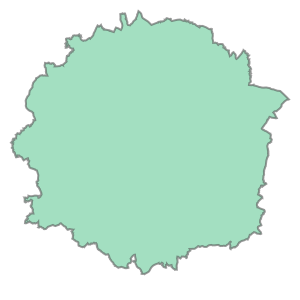

In [32]:
communes.unary_union

In [12]:
old_bdtopo = make_path("BATI_INDUSTRIEL_{}.shp", processed_data_path, "old", "BDTOPO", "LYON", "BATI_INDUSTRIEL_{}")

In [20]:
bati_indus_2013_old = gpd.read_file(old_bdtopo.format("2013", "2013"))
bati_indus_2023_old = gpd.read_file(old_bdtopo.format("2023", "2023"))

In [14]:
bati_indus_2013_old.shape

(100406, 2)

In [34]:
bati_indus_2013_new.columns

Index(['ID_left', 'PREC_PLANI_left', 'PREC_ALTI', 'ORIGIN_BAT', 'NATURE',
       'HAUTEUR', 'Z_MIN', 'Z_MAX', 'index_right', 'ID_right',
       'PREC_PLANI_right', 'NOM', 'CODE_INSEE', 'STATUT', 'CANTON',
       'ARRONDISST', 'DEPART', 'REGION', 'POPUL', 'MULTICAN', 'geometry'],
      dtype='object')

In [35]:
old_area = gpd.sjoin(bati_indus_2013_old, communes.dissolve(), how="inner", predicate="intersects")
new_area = gpd.sjoin(bati_indus_2013_new.drop("index_right", axis=1), communes.dissolve(), how="inner", predicate="intersects")

In [38]:
old_area.shape

(27157, 14)

In [37]:
new_area.shape

(31278, 32)

In [42]:
old_area = gpd.sjoin(bati_indus_2023_old, communes.dissolve(), how="inner", predicate="intersects")
new_area = gpd.sjoin(bati_indus_2023_new.drop("index_right", axis=1), communes.dissolve(), how="inner", predicate="intersects")

In [43]:
old_area.shape

(24348, 14)

In [44]:
new_area.shape

(15837, 65)

In [ ]:
old_area = bati_indus_2013_old

In [22]:
bati_indus_2023_old.shape

(90045, 2)

In [18]:
bati_indus_2013_old.head(2)

,id,geometry
0,1,"POLYGON Z ((920224.700 6404291.700 1463.700, 9..."
1,2,"POLYGON Z ((919907.700 6408411.900 970.900, 91..."


In [15]:
new_bdtopo = make_path("bati_indus_lyon_{}.gpkg", processed_data_path, "lyon", "{}", "BDTOPO")

In [39]:
bati_indus_2013_new = gpd.read_file(new_bdtopo.format("2013", "2013"))
bati_indus_2023_new = gpd.read_file(new_bdtopo.format("2023", "2023"))

In [40]:
bati_indus_2013_new.shape

(31278, 21)

In [41]:
bati_indus_2023_new.shape

(15837, 54)

In [19]:
bati_indus_2013_new.head(2)

,ID_left,PREC_PLANI_left,PREC_ALTI,ORIGIN_BAT,NATURE,HAUTEUR,Z_MIN,Z_MAX,index_right,ID_right,...,NOM,CODE_INSEE,STATUT,CANTON,ARRONDISST,DEPART,REGION,POPUL,MULTICAN,geometry
0,BATIMENT0000000243888084,1.5,1.0,Autre,Bâtiment agricole,9,286.7,287.1,0,SURFCOMM0000000023983859,...,Mionnay,01248,Commune simple,REYRIEUX,BOURG-EN-BRESSE,AIN,RHONE-ALPES,2077,Non,"POLYGON Z ((845044.100 6542414.500 287.100, 84..."
1,BATIMENT0000000008890437,1.5,1.0,Autre,Bâtiment agricole,6,301.3,301.3,0,SURFCOMM0000000023983859,...,Mionnay,01248,Commune simple,REYRIEUX,BOURG-EN-BRESSE,AIN,RHONE-ALPES,2077,Non,"POLYGON Z ((848423.800 6542070.700 301.300, 84..."
